In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Read the dataset into python environment
df=pd.read_csv('/content/credit.csv')

In [3]:
#shape of dataset(no.of rows & no.of columns)
df.shape

(100000, 28)

In [4]:
#display first 4 rows and columns
df.head(4)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good


In [5]:
#Display last 3 columns and rows
df.tail(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [6]:
#Display the names of columns in dataset credit
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
#Data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
#Check the null values in the dataset
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

7 catagorical columns and 21 numerical columns presented in the dataset

In [9]:
#Summary statistical information of numerical variables
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [10]:
#Summary statistical information of catagorivariables
df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


from this i know
There are 3 unique credit score categories in the dataset and most frequent credit score category is "Standard" which appears 53,174 times.

In [11]:
# check duplicates
duplicates = df.duplicated()
value_counts = duplicates.value_counts()

print(value_counts)


False    100000
dtype: int64


Here all rows are unique

In [12]:
# To check the independence of rows
df.duplicated().sum()

0

In [13]:
# Define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

#Display columns names
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 21 numerical columns : ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

We have 7 categorical columns : ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [14]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [15]:
df['Name'].value_counts()

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

In [16]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [17]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [18]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [19]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [20]:
df['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

# DATA VISUALIZATION

UNIVARIATE ANALYSIS

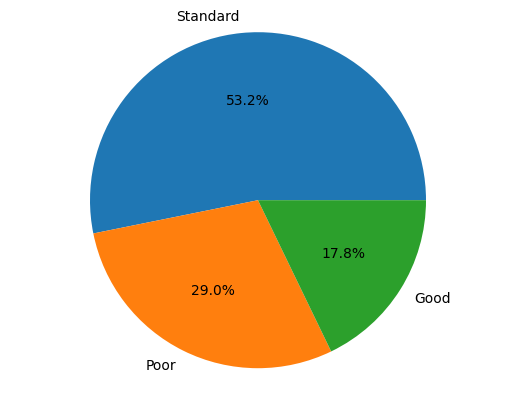

In [21]:
# Pie chart of credit score
plt.pie(df['Credit_Score'].value_counts(), labels=['Standard', 'Poor','Good'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

The majority falling within a standard range, a significant portion classified as poor, and a smaller proportion categorized as good.

BIVARIATE ANALYSIS

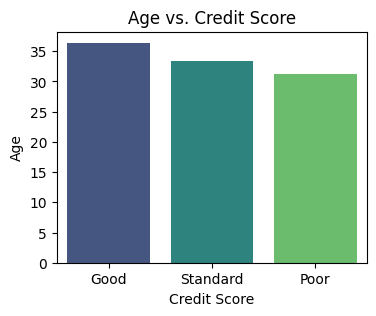

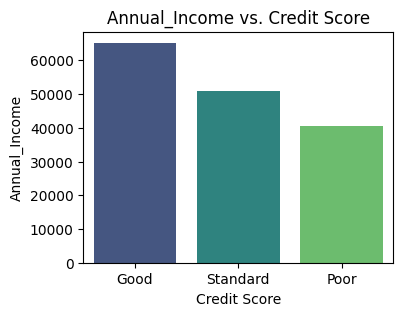

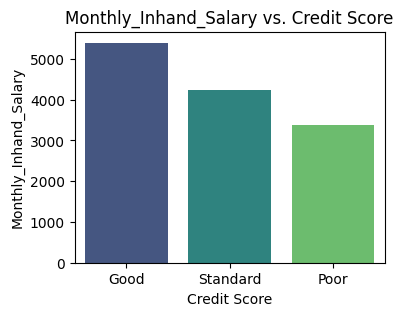

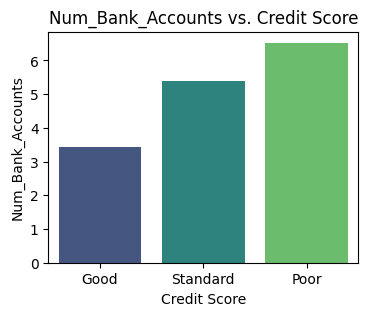

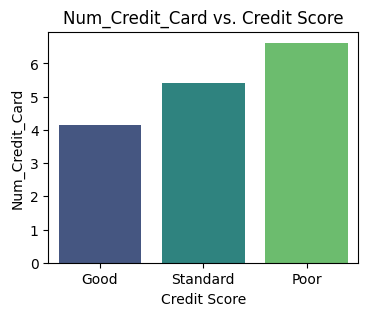

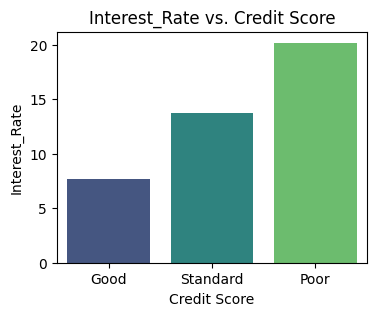

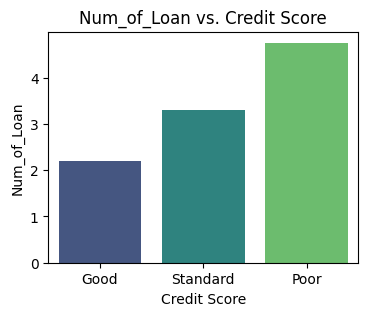

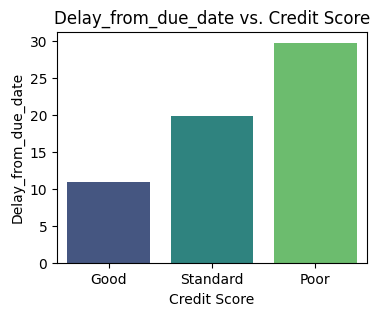

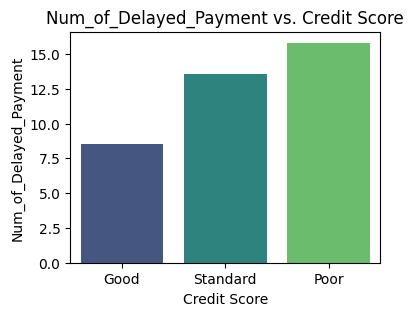

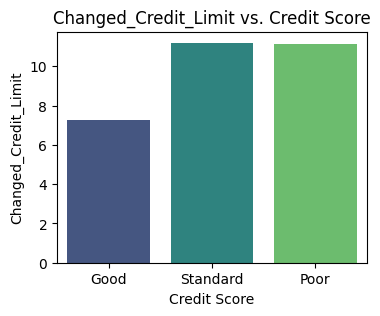

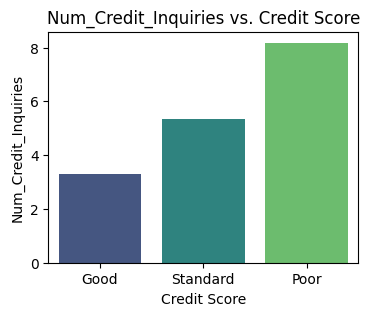

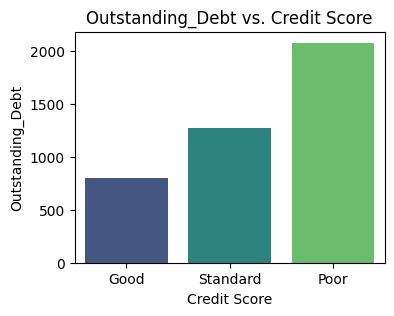

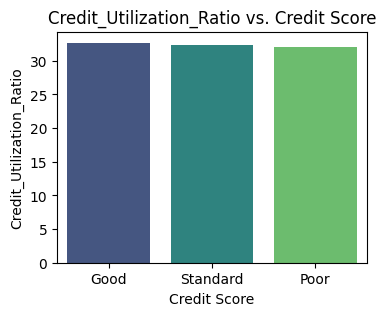

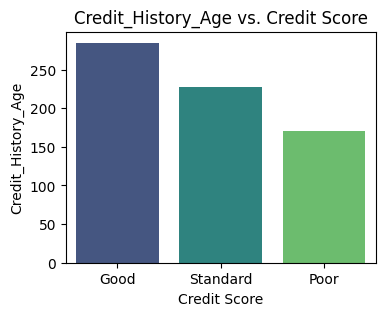

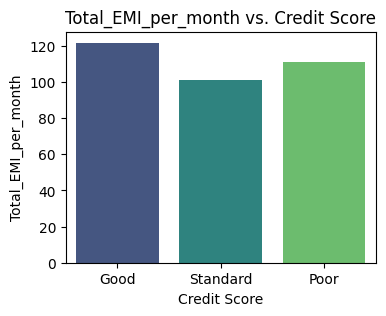

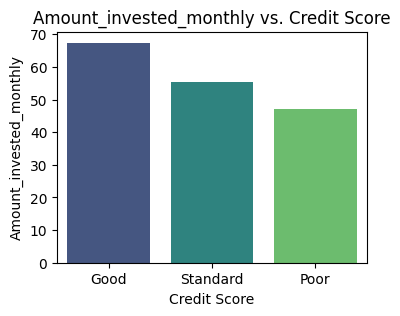

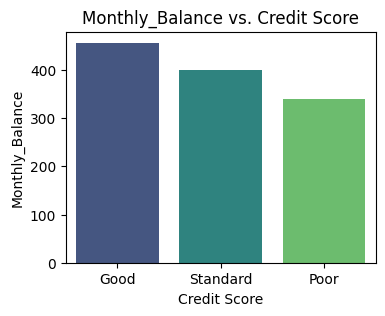

In [22]:
#Distribution of creditscore
# List of numerical columns (excluding 'Credit_Score')
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through each numerical column
for column in numerical_columns:
    # Create a bar plot for the current column and 'Credit_Score'
    plt.figure(figsize=(4, 3))
    sns.barplot(x='Credit_Score', y=column, data=df, errorbar=None, hue='Credit_Score', palette='viridis', legend=False)
    plt.xlabel('Credit Score')
    plt.ylabel(column)
    plt.title(f'{column} vs. Credit Score')
    plt.show()


# HEATMAP

<ipython-input-23-9d5527ce7cd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


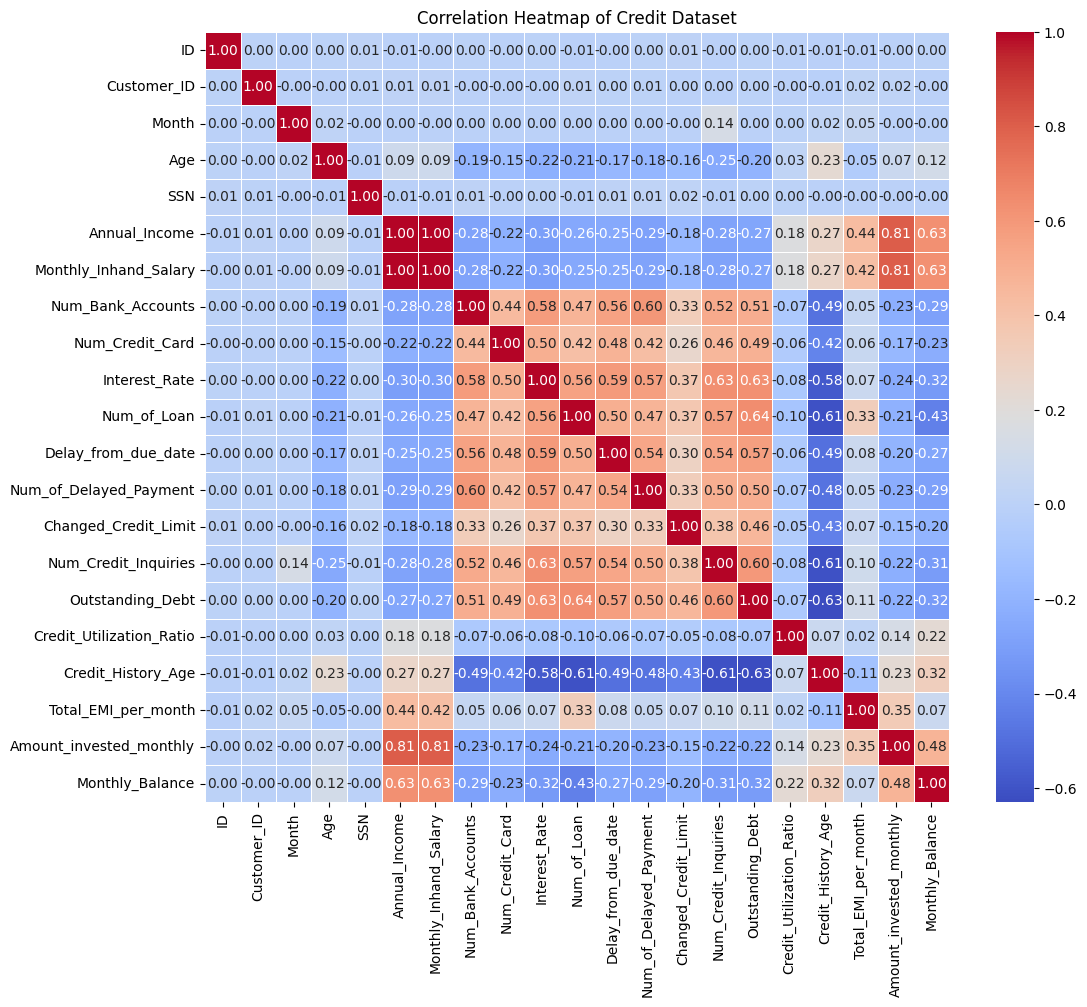

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Credit Dataset')
plt.show()

a perfect positive correlation between "Annual Income" and "Monthly Inhand Salary".There is a positive correlation between 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt'.And these columns have a strong negative correlationwith credit_history_age.

# OUTLIERS DETECTION

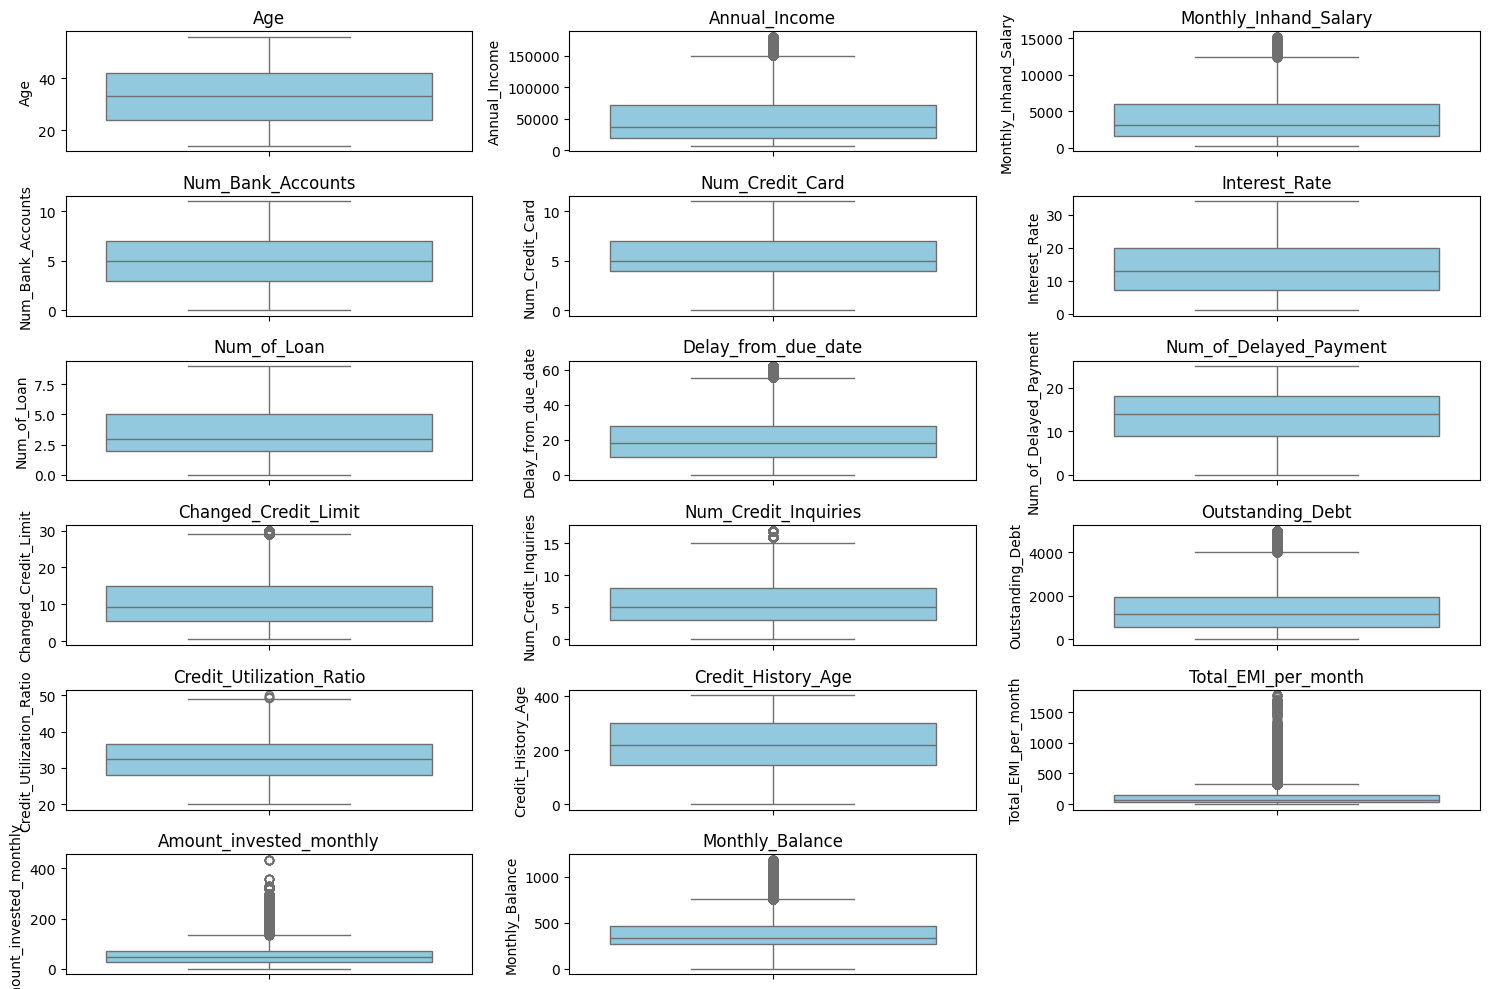

In [24]:
#box plot
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance' in these columns detected outliers

# PREPROCESSING


DATA CLEANING

In [25]:
df_prep = df.copy()
df_prep

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


HANDLING DUPLICATES

In [26]:
# fix there is no duplicates
print(f'The number of rows before filtering for duplicate data is {df_prep.shape[0]}')
# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'The number of rows after filtering duplicate data is {df_prep.shape[0]}')

The number of rows before filtering for duplicate data is 100000
The number of rows after filtering duplicate data is 100000


HANDLING OUTLIERS

In [27]:
##zscore
# View total rows before filtering
print(f'The number of rows before filtering outliers is {df_prep.shape[0]}')

# Specify columns with outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Handle outliers using z-score for each specified column
filtered_entries = np.array([True] * len(df_prep))
for col in outlier_columns:
    zscore = np.abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# Filter DataFrame to remove outliers
df_prep = df_prep[filtered_entries]

# View total rows after filtering
print(f'The number of rows after filtering outliers is {df_prep.shape[0]}')

The number of rows before filtering outliers is 100000
The number of rows after filtering outliers is 94587


note..The z-score is a score that measures how many standard deviations a data point is away from the mean.The z-score must be used with a normal distribution, which is one of the prerequisites for calculating a standard deviation. We know that in a normal distribution, over 99% of values fall within 3 standard deviations from the mean. Because of this, we can assume that if a z-score returned is larger than 3 that the value is quite unusual.

In [28]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each categorical feature
cramer_vs = {}
for column in df_prep.select_dtypes(include=['object']).columns:
    confusion_matrix = pd.crosstab(df_prep[column], df_prep['Credit_Score'])
    cramer_vs[column] = cramers_v(confusion_matrix)

# Display Cramér's V values for each categorical feature
print("Cramér's V values for each categorical feature:")
for column, cramer_v in cramer_vs.items():
    print(f"{column}: {cramer_v}")


Cramér's V values for each categorical feature:
Name: 0.6718032382889
Occupation: 0.029609090428419384
Type_of_Loan: 0.5308585225314616
Credit_Mix: 0.4570200741008066
Payment_of_Min_Amount: 0.31622889388357267
Payment_Behaviour: 0.08139342603966523
Credit_Score: 1.0


In [29]:
from scipy.stats import f_oneway

# List of numerical columns
numerical_columns = [ 'ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Perform ANOVA for each numerical column
anova_results = {}
for column in numerical_columns:
    # Perform one-way ANOVA
    anova_statistic, p_value = f_oneway(*[group[column] for name, group in df_prep.groupby('Credit_Score')])
    anova_results[column] = {'ANOVA Statistic': anova_statistic, 'P-Value': p_value}

# Display ANOVA results
for column, result in anova_results.items():
    print(f"ANOVA Results for '{column}':")
    print(f"  - ANOVA Statistic: {result['ANOVA Statistic']}")
    print(f"  - P-Value: {result['P-Value']}")


ANOVA Results for 'ID':
  - ANOVA Statistic: 3.8916731572203496
  - P-Value: 0.020414434750484853
ANOVA Results for 'Customer_ID':
  - ANOVA Statistic: 6.403137624181717
  - P-Value: 0.0016570701856000025
ANOVA Results for 'Month':
  - ANOVA Statistic: 58.480739246251034
  - P-Value: 4.147897970675384e-26
ANOVA Results for 'Age':
  - ANOVA Statistic: 1274.4852619436506
  - P-Value: 0.0
ANOVA Results for 'SSN':
  - ANOVA Statistic: 15.939241539113189
  - P-Value: 1.199061994990725e-07
ANOVA Results for 'Annual_Income':
  - ANOVA Statistic: 1633.3552032126554
  - P-Value: 0.0
ANOVA Results for 'Monthly_Inhand_Salary':
  - ANOVA Statistic: 1612.392843537196
  - P-Value: 0.0
ANOVA Results for 'Num_Bank_Accounts':
  - ANOVA Statistic: 8827.908830108021
  - P-Value: 0.0
ANOVA Results for 'Num_Credit_Card':
  - ANOVA Statistic: 9324.588110389746
  - P-Value: 0.0
ANOVA Results for 'Interest_Rate':
  - ANOVA Statistic: 14919.780365261648
  - P-Value: 0.0
ANOVA Results for 'Num_of_Loan':
  - ANO

DROP COLUMNS

In [30]:
# Drop the specified columns
df_prep = df_prep.drop(columns=['ID', 'Customer_ID', 'Month', 'SSN', 'Name', 'Occupation', 'Payment_Behaviour'])




In [31]:
df_prep.head(4)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,...,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,312.494089,Good
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,...,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,284.629162,Good
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,...,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,331.209863,Good
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,...,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,223.451310,Good


# ENCODING

In [32]:
# View dimension size of data before encoding
print(f'Data dimensions before encoding are {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

Data dimensions before encoding are 94587 rows and 21 columns


In [33]:
#Label encoding of Credit_Mix
credit_mix_mapping = {'Standard': 0, 'Good': 1, 'Bad': 2}

# Apply label encoding using map
df_prep['Credit_Mix'] = df_prep['Credit_Mix'].map(credit_mix_mapping)

In [34]:
#Label encoding of Payment_of_Min_Amount
payment_mapping = {'Yes': 1, 'No': 0, 'NM': -1}

# Apply label encoding using map
df_prep['Payment_of_Min_Amount'] = df_prep['Payment_of_Min_Amount'].map(payment_mapping)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Label encoding of 'Type_of_Loan' column
label_encoder = LabelEncoder()
df_prep['Type_of_Loan'] = label_encoder.fit_transform(df_prep['Type_of_Loan'])


In [36]:
#Label encoding of Credit_Score
label_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}

# Map the categories to numerical labels using the defined mapping
df_prep['Credit_Score'] = df_prep['Credit_Score'].map(label_mapping)

In [37]:
df_prep.head(3)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,3.0,7.0,...,4.0,1,809.98,26.822620,265.0,0,49.574949,21.46538,312.494089,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,3.0,4.0,...,4.0,1,809.98,31.944960,266.0,0,49.574949,21.46538,284.629162,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,3.0,7.0,...,4.0,1,809.98,28.609352,267.0,0,49.574949,21.46538,331.209863,0


# SCALING

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define columns for normalization and standardization
columns_to_normalize = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card']
columns_to_standardize = ['Monthly_Inhand_Salary', 'Interest_Rate', 'Num_of_Loan',
                          'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                          'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                          'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
                          'Monthly_Balance']

# Initialize MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()

# Initialize StandardScaler for standardization
standard_scaler = StandardScaler()

# Normalize selected columns
df_prep[columns_to_normalize] = min_max_scaler.fit_transform(df_prep[columns_to_normalize])

# Standardize selected columns
df_prep[columns_to_standardize] = standard_scaler.fit_transform(df_prep[columns_to_standardize])



In [39]:
df_prep.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,94587.000000,94587.000000,9.458700e+04,94587.000000,94587.000000,9.458700e+04,9.458700e+04,94587.000000,9.458700e+04,9.458700e+04,...,9.458700e+04,94587.000000,9.458700e+04,9.458700e+04,9.458700e+04,94587.000000,9.458700e+04,9.458700e+04,9.458700e+04,94587.000000
mean,0.457791,0.249404,-9.555334e-17,0.493910,0.506025,-3.215159e-17,-6.610608e-17,3109.787455,7.102648e-17,-3.545690e-17,...,8.113019e-17,0.772971,-2.364795e-16,7.124057e-16,1.938110e-17,0.417383,-1.714251e-16,-4.540286e-16,1.496401e-16,1.129172
std,0.255860,0.212913,1.000005e+00,0.234207,0.188114,1.000005e+00,1.000005e+00,1681.330367,1.000005e+00,1.000005e+00,...,1.000005e+00,0.813145,1.000005e+00,1.000005e+00,1.000005e+00,0.694709,1.000005e+00,1.000005e+00,1.000005e+00,0.669512
min,0.000000,0.000000,-1.267933e+00,0.000000,0.000000,-1.571587e+00,-1.471269e+00,0.000000,-1.438307e+00,-2.182112e+00,...,-1.516517e+00,0.000000,-1.259556e+00,-2.402769e+00,-2.194585e+00,-1.000000,-1.020418e+00,-1.585353e+00,-2.132102e+00,0.000000
25%,0.238095,0.075828,-8.095395e-01,0.363636,0.363636,-7.708546e-01,-6.493372e-01,1716.000000,-7.648843e-01,-7.248993e-01,...,-7.425673e-01,0.000000,-7.520281e-01,-8.325859e-01,-7.775402e-01,0.000000,-7.145171e-01,-7.360302e-01,-6.241211e-01,1.000000
50%,0.452381,0.179738,-3.233537e-01,0.545455,0.454545,-8.451291e-02,-2.383713e-01,3363.000000,-2.261460e-01,8.466311e-02,...,3.138227e-02,1.000000,-2.197819e-01,3.315345e-03,-1.374283e-02,1.000000,-3.383966e-01,-2.316163e-01,-2.680768e-01,1.000000
75%,0.666667,0.377297,5.949168e-01,0.636364,0.636364,6.018288e-01,5.835606e-01,4460.000000,4.472769e-01,7.323131e-01,...,8.053319e-01,1.000000,4.796617e-01,8.342493e-01,8.003044e-01,1.000000,4.566196e-01,5.020642e-01,3.894669e-01,2.000000
max,1.000000,1.000000,3.506081e+00,1.000000,1.000000,2.203293e+00,2.227424e+00,6111.000000,2.736915e+00,1.865700e+00,...,2.869198e+00,2.000000,3.040270e+00,3.055389e+00,1.855551e+00,1.000000,4.313598e+00,3.773100e+00,3.508367e+00,2.000000


# SPLIT DATASET INTO TRAINING ,VALIDATION AND TESTING

In [40]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_prep.drop(columns=['Credit_Score'])
y = df_prep['Credit_Score']

# Split the data into training (70%) and temporary sets (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation (15%) and testing sets (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# FEATURE IMPORTANCE

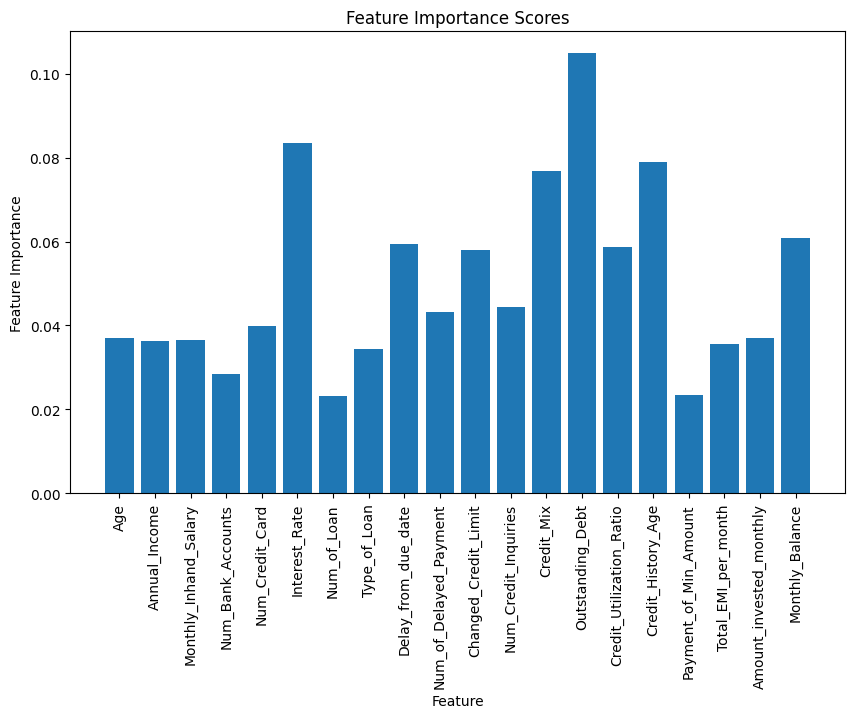

In [41]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on your training data (X_train_temp and y_train_temp)
rf_classifier.fit(X_train_temp, y_train_temp)

# Extract feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of selected features
selected_features = X_train_temp.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances)
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()



# FEATURE SELECTION

In [42]:
from sklearn.feature_selection import VarianceThreshold

# Set the variance threshold value
threshold_value = 0.01

# Initialize VarianceThreshold
variance_threshold = VarianceThreshold(threshold=threshold_value)

# Fit the VarianceThreshold to your data
variance_threshold.fit(X_train_temp)

# Get the indices of the features that are above the threshold
selected_features_indices = variance_threshold.get_support(indices=True)

# Get the selected features
selected_features = X_train_temp.columns[selected_features_indices]

print("Selected Features:")
print(selected_features)



Selected Features:
Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')


# HANDLE IMBALANCE DATA

In [43]:
from imblearn.over_sampling import SMOTE
# Print original training data information
print(f'The amount of training data before SMOTE consists of {len(X_train_temp)} rows')
print(f'Number of class 0 in training data: {sum(y_train_temp==0)}')
print(f'Number of class 1 in training data: {sum(y_train_temp==1)}\n')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_temp, y_train_temp = smote.fit_resample(X_train_temp, y_train_temp)

# Print resampled training data information
print(f'Amount of training data after SMOTE consisting of {len(X_train_temp)} rows')
print(f'Number of class 0 in resampled training data: {sum(y_train_temp==0)}')
print(f'Number of class 1 in resampled training data: {sum(y_train_temp==1)}\n')

The amount of training data before SMOTE consists of 66210 rows
Number of class 0 in training data: 11112
Number of class 1 in training data: 35386

Amount of training data after SMOTE consisting of 106158 rows
Number of class 0 in resampled training data: 35386
Number of class 1 in resampled training data: 35386



In [44]:
c=pd.DataFrame(X_train_temp, y_train_temp)
c.head(7)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,,,,
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
2,0.095238,0.419116,0.697820,0.636364,0.727273,1.288171,0.583561,4244,-0.360831,1.541875,-0.118847,0.547349,2,0.565591,0.889931,-0.978540,1,0.968345,-0.245019,0.460474
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
2,0.095238,0.419116,0.697820,0.636364,0.727273,1.288171,0.583561,4244,-0.360831,1.541875,-0.118847,0.547349,2,0.565591,0.889931,-0.978540,1,0.968345,-0.245019,0.460474
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387


# SAVE

In [45]:
# Save preprocessed training data into a CSV file named 'Credit_Preprocessing_train.csv' without including the index
X_train_temp.to_csv('Credit_Preprocessing_train.csv', index=False)

# Save preprocessed testing data into a CSV file named 'Credit_Preprocessing_test.csv' without including the index
X_test.to_csv('Credit_Preprocessing_test.csv', index=False)

# MODEL SELECTION

In [46]:
# Set function for confusion matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)

    # Replace tick labels
    ax.xaxis.set_ticklabels(['Poor', 'Good', 'Standard'])
    ax.yaxis.set_ticklabels(['Poor', 'Good', 'Standard'])

    plt.show()

    print(f'From the {title} model it is found that:')
    print(f'- Total TP (True Positive) = {cm[1][1]}')
    print(f'- Total TN (True Negative) = {cm[0][0]}')
    print(f'- Total FP (False Positive) = {cm[0][1]}')
    print(f'- Total FN (False Negative) = {cm[1][0]}')

In [47]:
#from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
#scaler = StandardScaler()

# Fit and transform the training data
#X_train_scaled = scaler.fit_transform(X_train_temp)

# Transform the test data using the same scaler
#X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model with scaled data
#model_lr_scaled = LogisticRegression(random_state=42, max_iter=1000)
#model_lr_scaled.fit(X_train_scaled, y_train_temp)

# Predict labels for the test set
#y_pred_lr_scaled = model_lr_scaled.predict(X_test_scaled)

# Calculate accuracy
#accuracy_lr_scaled = accuracy_score(y_test, y_pred_lr_scaled)
#print("Accuracy (scaled data):", accuracy_lr_scaled)
# Plot the confusion matrix for the logistic regression model
#plotting_confusion_matrix(model_lr_scaled, X_test_scaled, y_test, title='Logistic Regression (Scaled)')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6099795616322503


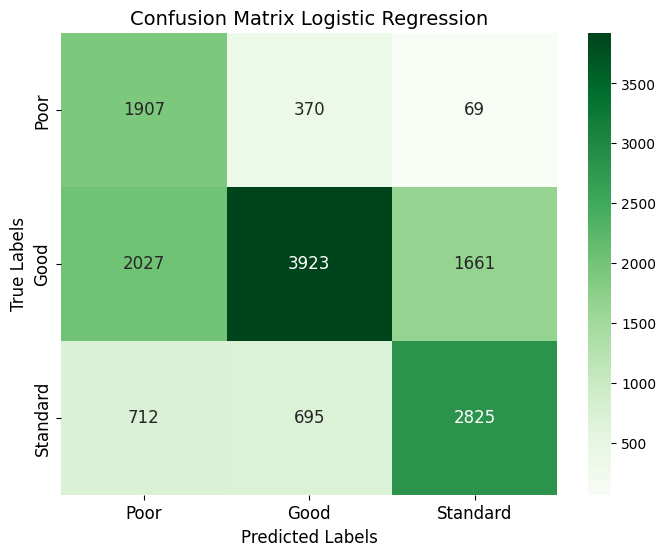

From the Logistic Regression model it is found that:
- Total TP (True Positive) = 3923
- Total TN (True Negative) = 1907
- Total FP (False Positive) = 370
- Total FN (False Negative) = 2027


In [48]:
# Create and train the logistic regression model with a different solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

# Plot the confusion matrix for the logistic regression model
plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')


Accuracy: 0.7459299457326097


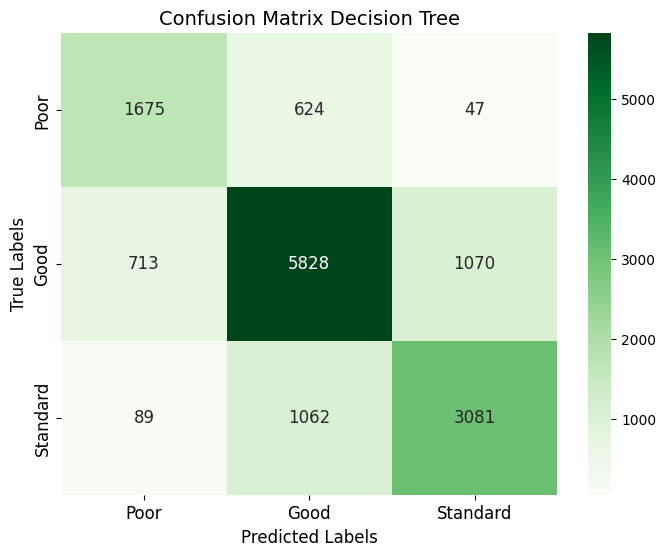

From the Decision Tree model it is found that:
- Total TP (True Positive) = 5828
- Total TN (True Negative) = 1675
- Total FP (False Positive) = 624
- Total FN (False Negative) = 713


In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Plot the confusion matrix for the Decision Tree classifier
plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')


Accuracy: 0.8148565790401014


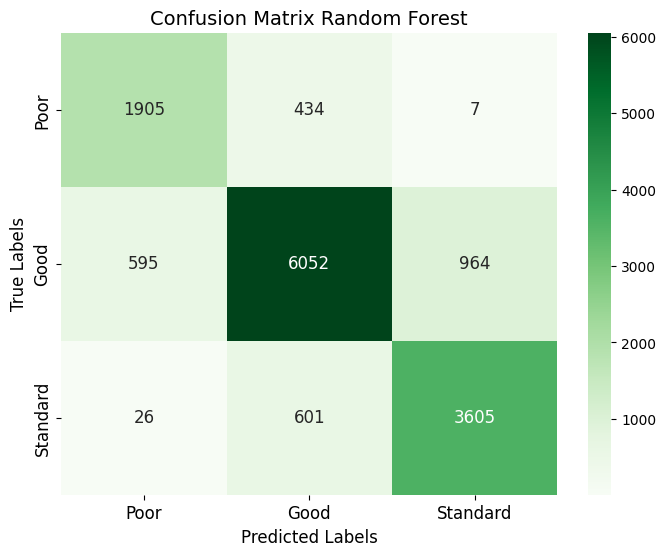

From the Random Forest model it is found that:
- Total TP (True Positive) = 6052
- Total TN (True Negative) = 1905
- Total FP (False Positive) = 434
- Total FN (False Negative) = 595


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Plot the confusion matrix for the Random Forest classifier
plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')


Accuracy: 0.7649587708788498


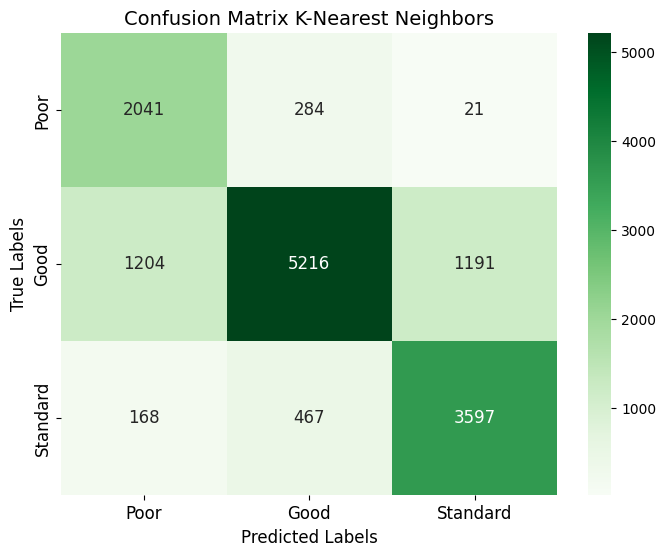

From the K-Nearest Neighbors model it is found that:
- Total TP (True Positive) = 5216
- Total TN (True Negative) = 2041
- Total FP (False Positive) = 284
- Total FN (False Negative) = 1204


In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_knn = model_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Plot the confusion matrix for the KNN classifier
plotting_confusion_matrix(model_knn, X_test, y_test, title='K-Nearest Neighbors')


Accuracy: 0.6667841285502855


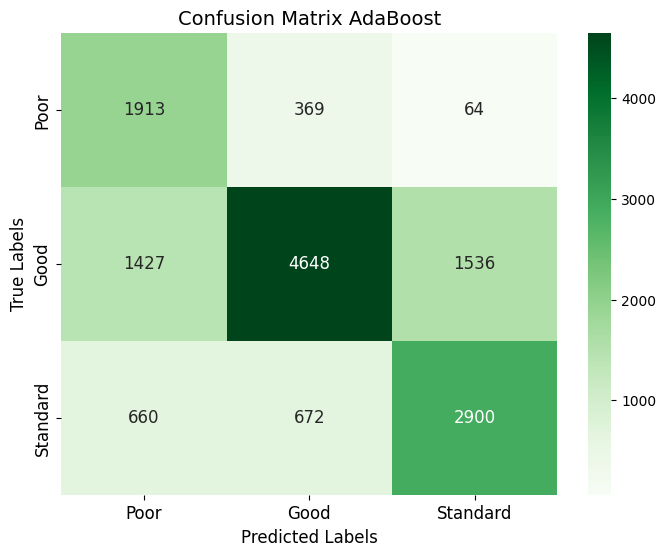

From the AdaBoost model it is found that:
- Total TP (True Positive) = 4648
- Total TN (True Negative) = 1913
- Total FP (False Positive) = 369
- Total FN (False Negative) = 1427


In [52]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_adaboost = model_adaboost.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy_adaboost)

# Plot the confusion matrix for the AdaBoost classifier
plotting_confusion_matrix(model_adaboost, X_test, y_test, title='AdaBoost')


In [53]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred, average='macro'), 4)
    recall = round(recall_score(y_test, y_pred, average='macro'), 4)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr'), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train, average='macro', multi_class='ovr'), 4)

    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train_temp, y_train_temp, X_test, y_test):
    model_name = ['Logistic Regression','Decision Tree', 'Random Forest','K-Nearest Neighbors' 'AdaBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train_temp, y_train_temp, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model


In [54]:
# Assuming model_lr, model_dt, and model_rf are previously trained models
model_list_base = [model_lr, model_dt, model_rf,model_knn,model_adaboost]

score_all_classification(model_list_base, X_train_temp, y_train_temp, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.6100,0.6057,0.6653,0.6037,0.4309,0.7830,0.8099
1,Decision Tree,0.7459,0.7286,0.7359,0.7321,0.5758,0.7953,1.0000
2,Random Forest,0.8149,0.7986,0.8197,0.8080,0.6960,0.9247,1.0000
3,K-Nearest NeighborsAdaBoost,0.7650,0.7400,0.8018,0.7576,0.6401,0.8981,0.9842


From the evaluation results of the 5 models, it was found that:

The Logistic Regression model was able to produce sufficient accuracy
The Decision Tree model is able to produce quite high accuracy, namely 74
The Random Forest model is able to produce very high accuracy, namely 81

So it can be concluded from the 5 models selected, while the Random Forest Model is the best base model, we still have to carry out further tuning to avoid overfitting.

# HYPERPARAMETER TUNING

In [55]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

list_hyperparameters = [
    {  # Logistic Regression
        'penalty': ['l2', 'l1', 'elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    {  # Decision Tree
        'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split': [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(1, 10, 5)],
        'max_features': ['auto', 'sqrt']
    },
    {  # Random Forest
        'n_estimators': [int(x) for x in np.linspace(50, 1000, 50)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 100, 10)],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight': ['balanced', 'balanced_subsample'],
        'oob_score': [True, False]
    },
    {  # AdaBoost
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    {  # k-Nearest Neighbors
        'n_neighbors': [5, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
]


def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items():
        print('Best ' + key + ':', model.best_estimator_.get_params()[key])


def eval_after_hyperparameter_tuning(random_search, X_train_temp, y_train_temp, X_val, y_val):
    eval_new = eval_classification(random_search, X_train_temp, y_train_temp, X_val, y_val)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy (Logistic Regression After Tuning): 0.6270350271336951


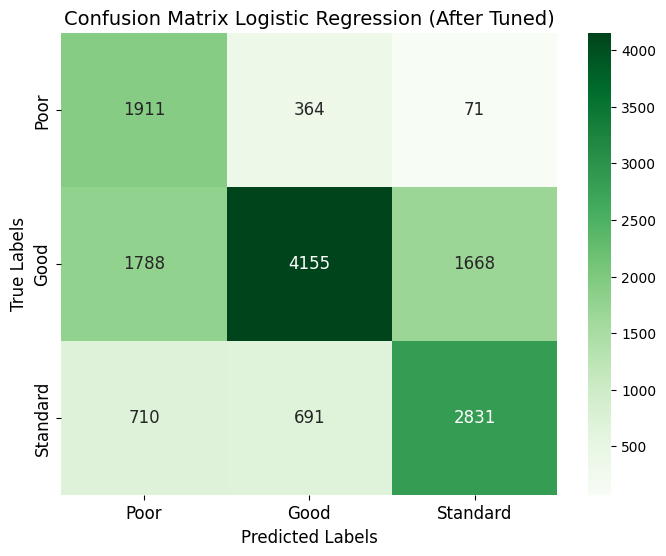

From the Logistic Regression (After Tuned) model it is found that:
- Total TP (True Positive) = 4155
- Total TN (True Negative) = 1911
- Total FP (False Positive) = 364
- Total FN (False Negative) = 1788


In [56]:
# Instantiate Logistic Regression model
model_lr = LogisticRegression(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)

# Fit tuned model to the training data
tuned_lr.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_tuned_lr = tuned_lr.predict(X_test)

# Calculate accuracy
accuracy_tuned_lr = accuracy_score(y_test, y_pred_tuned_lr)

# Print accuracy
print("Accuracy (Logistic Regression After Tuning):", accuracy_tuned_lr)

# Plot confusion matrix for tuned Logistic Regression model using test data
plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Accuracy (Decision Tree After Tuning): 0.738388892804285


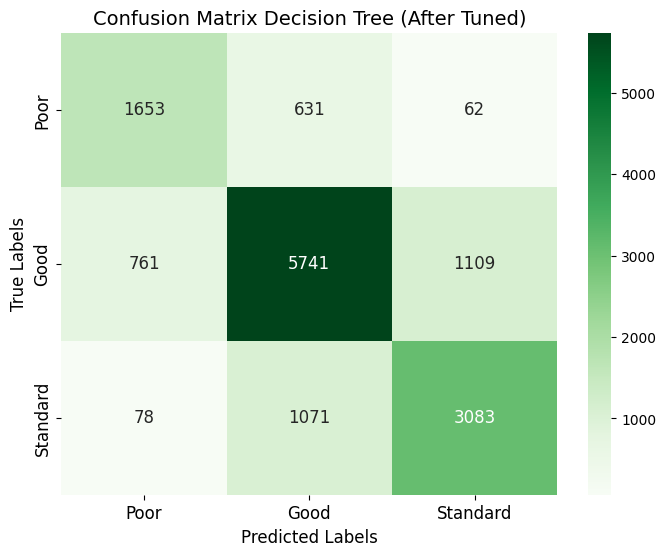

From the Decision Tree (After Tuned) model it is found that:
- Total TP (True Positive) = 5741
- Total TN (True Negative) = 1653
- Total FP (False Positive) = 631
- Total FN (False Negative) = 761


In [57]:
# Instantiate Decision Tree Classifier model
model_dt = DecisionTreeClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)

# Fit tuned model to the training data
tuned_dt.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_tuned_dt = tuned_dt.predict(X_test)

# Calculate accuracy
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)

# Print accuracy
print("Accuracy (Decision Tree After Tuning):", accuracy_tuned_dt)

# Plot confusion matrix for tuned Decision Tree model using test data
plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy (Random Forest After Tuning): 0.8181690041581506


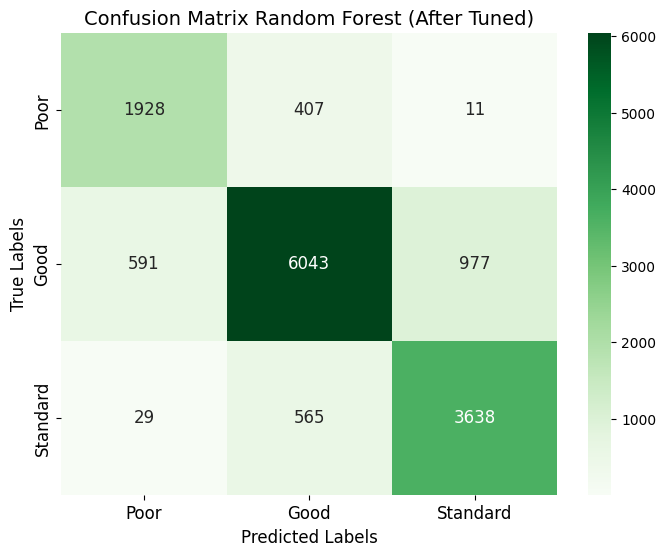

From the Random Forest (After Tuned) model it is found that:
- Total TP (True Positive) = 6043
- Total TN (True Negative) = 1928
- Total FP (False Positive) = 407
- Total FN (False Negative) = 591


In [58]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier model with max_features explicitly set to 'sqrt'
model_rf = RandomForestClassifier(random_state=42, max_features='sqrt')

# Perform hyperparameter tuning using RandomizedSearchCV
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)

# Fit tuned model to the training data
tuned_rf.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_tuned_rf = tuned_rf.predict(X_test)

# Calculate accuracy
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)

# Print accuracy
print("Accuracy (Random Forest After Tuning):", accuracy_tuned_rf)

# Plot confusion matrix for tuned Random Forest model using test data
plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')


Accuracy (KNN After Tuning): 0.7894848121784481


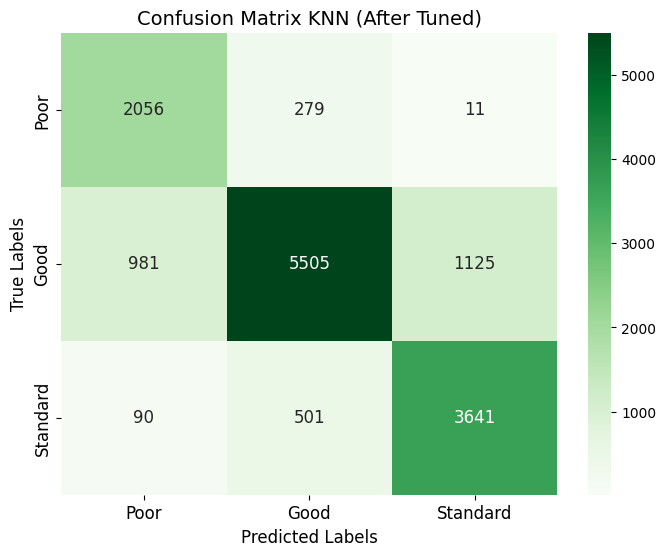

From the KNN (After Tuned) model it is found that:
- Total TP (True Positive) = 5505
- Total TN (True Negative) = 2056
- Total FP (False Positive) = 279
- Total FN (False Negative) = 981


In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN model
model_knn = KNeighborsClassifier()

# Perform hyperparameter tuning using RandomizedSearchCV
tuned_knn = RandomizedSearchCV(model_knn, list_hyperparameters[4], cv=5, scoring='accuracy', random_state=42)

# Fit tuned model to the training data
tuned_knn.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_tuned_knn = tuned_knn.predict(X_test)

# Calculate accuracy
accuracy_tuned_knn = accuracy_score(y_test, y_pred_tuned_knn)

# Print accuracy
print("Accuracy (KNN After Tuning):", accuracy_tuned_knn)

# Plot confusion matrix for tuned KNN model using test data
plotting_confusion_matrix(tuned_knn, X_test, y_test, title='KNN (After Tuned)')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.6691803509761083


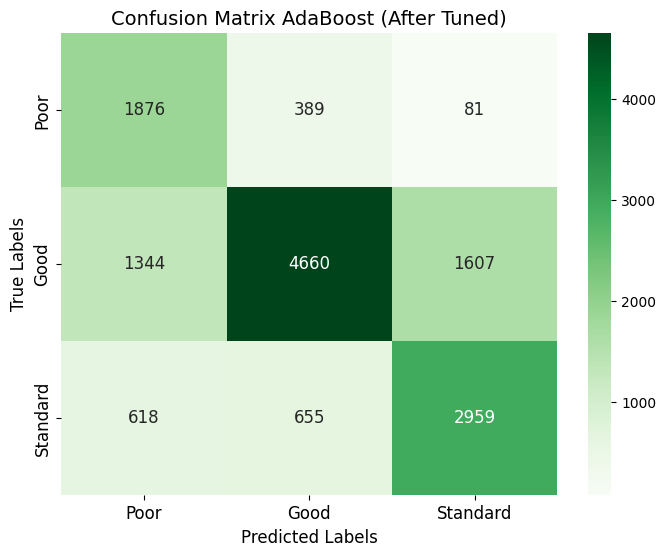

From the AdaBoost (After Tuned) model it is found that:
- Total TP (True Positive) = 4660
- Total TN (True Negative) = 1876
- Total FP (False Positive) = 389
- Total FN (False Negative) = 1344


In [109]:
# Instantiate AdaBoost Classifier model
model_adaboost = AdaBoostClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
tuned_adaboost = RandomizedSearchCV(model_adaboost, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)

# Fit tuned model to the training data
tuned_adaboost.fit(X_train_temp, y_train_temp)

# Predict labels for the test set
y_pred_adaboost = tuned_adaboost.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy_adaboost)

# Plot confusion matrix for tuned AdaBoost model using test data
plotting_confusion_matrix(tuned_adaboost, X_test, y_test, title='AdaBoost (After Tuned)')

In [61]:
# Tuned model list
model_list_tuned = [
    tuned_lr.best_estimator_,
    tuned_dt.best_estimator_,
    tuned_rf.best_estimator_,
    tuned_knn.best_estimator_,
    tuned_adaboost.best_estimator_
]

# Score the tuned models
score_all_classification(model_list_tuned, X_train_temp, y_train_temp, X_test, y_test)


,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.6270,0.6168,0.6765,0.6191,0.4490,0.7890,0.8147
1,Decision Tree,0.7384,0.7198,0.7291,0.7242,0.5642,0.7900,1.0000
2,Random Forest,0.8182,0.8015,0.8251,0.8119,0.7026,0.9260,0.9993
3,K-Nearest NeighborsAdaBoost,0.7895,0.7652,0.8200,0.7840,0.6710,0.9144,1.0000


There is a small point variation only

In [110]:
##Check Overfitting and Underfitting
from sklearn.metrics import accuracy_score

def checkoverfit(model, X_train_temp, X_test, title):
    accuracy_train = accuracy_score(y_train_temp, model.predict(X_train_temp))
    accuracy_test = accuracy_score(y_test, model.predict(X_test))
    accuracy_cv = model.best_score_

    cek = pd.DataFrame({
        'Model': [title],
        'accuracy_score_train': [accuracy_train],
        'accuracy_score_test': [accuracy_test],
        'accuracy_score_cv': [accuracy_cv]
    })

    return cek

# Example usage:
checkoverfit(tuned_rf, X_train_temp, X_test, 'Random Forest Classifier')


,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,Random Forest Classifier,0.977533,0.818169,0.873651


# CROSS VALIDATION

---



In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a RandomForestClassifier named 'tuned_rf' and your feature matrix is 'X_train_temp' with corresponding labels 'y_train_temp'
# Define your RandomForestClassifier model
model = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_temp, y_train_temp, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.84141861 0.86256594 0.88272419 0.89529462 0.89491781]
Mean CV Accuracy: 0.8753842333498986


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the validation dataset (X_val, y_val)

# Assuming you already have a tuned random forest model named 'tuned_rf'
# Evaluate the model on the validation dataset
y_pred_val = tuned_rf.predict(X_val)

# Calculate evaluation metrics
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average=None)  # Compute precision for each class independently
recall_val = recall_score(y_val, y_pred_val, average=None)  # Compute recall for each class independently
f1_val = f1_score(y_val, y_pred_val, average=None)  # Compute F1 score for each class independently
auc_val = roc_auc_score(y_val, tuned_rf.predict_proba(X_val), multi_class='ovo')


# Print the evaluation metrics
print("Validation Metrics for Tuned Random Forest Model:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("AUC:", auc_val)

Validation Metrics for Tuned Random Forest Model:
Accuracy: 0.8191429376938257
Precision: [0.75196409 0.86948931 0.78328307]
Recall: [0.83023544 0.78486998 0.87551168]
F1 Score: [0.78916372 0.82501553 0.82683343]
AUC: 0.9345670743870512


In [92]:
c.head(20)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,,,,
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
2,0.095238,0.419116,0.697820,0.636364,0.727273,1.288171,0.583561,4244,-0.360831,1.541875,-0.118847,0.547349,2,0.565591,0.889931,-0.978540,1,0.968345,-0.245019,0.460474
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
2,0.095238,0.419116,0.697820,0.636364,0.727273,1.288171,0.583561,4244,-0.360831,1.541875,-0.118847,0.547349,2,0.565591,0.889931,-0.978540,1,0.968345,-0.245019,0.460474
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
1,0.952381,0.065139,-0.891858,0.545455,0.636364,-0.198903,-1.060303,3364,-0.158804,0.570401,-0.439622,-1.000551,0,-0.741239,-1.933361,1.493752,-1,-0.867658,-0.716378,-0.822387
2,0.095238,0.419116,0.697820,0.636364,0.727273,1.288171,0.583561,4244,-0.360831,1.541875,-0.118847,0.547349,2,0.565591,0.889931,-0.978540,1,0.968345,-0.245019,0.460474


# Output prediction

In [142]:
import pickle

In [143]:
f=open('mymodel2.pkl', 'wb')
pickle.dump(tuned_rf,f)

In [144]:
f.close()

In [145]:
a=open('/content/mymodel2.pkl','rb')

In [146]:
our_model=pickle.load(a)

In [147]:
k=[[0.952381, 0.065139, -0.891858, 0.545455, 0.636364, -0.198903, -1.060303, 3364, -0.158804, 0.570401, -0.439622, -1.000551, 0, -0.741239, -1.933361, 1.493752, -1, -0.867658, -0.716378, -0.822387]]

In [148]:
x=our_model.predict(k)
x

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [149]:
import pickle

# Load the trained model
with open('mymodel2.pkl', 'rb') as file:
    our_model_model = pickle.load(file)
    predictions = our_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

Accuracy: 0.8181690041581506


In [150]:
import pickle

# New input features (replace with your actual data)
new_k = [[0.095238, 0.419116, 0.697820, 0.636364, 0.727273, 1.288171, 0.583561, 4244, -0.360831, 1.541875, -0.118847, 0.547349, 2, 0.565591, 0.889931, -0.978540, 1, 0.968345, -0.245019, 0.460474]]

# Make predictions
predictions = our_model.predict(new_k)

# Print the predictions
print(f'The predicted class for the input data is: {predictions}')

The predicted class for the input data is: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [151]:
import pickle

# New input features (replace with your actual data)
new_k = [[0.238095, 0.391004, 0.612852, 0.727273, 0.818182, 2.203293, 0.994527, 4326, 1.457411, 1.703788, 2.102371, 1.579281, 2, 2.349109, -1.895638, -0.596641, -1, 1.253310, -0.165381, -1.348556]]

# Make predictions
predictions = our_model.predict(new_k)

# Print the predictions
print(f'The predicted class for the input data is: {predictions}')

The predicted class for the input data is: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
